In [33]:
import re
import pandas as pd
import numpy as np

from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Prepare data
trump = pd.read_csv('dataset\\fsas\\fsas_full_utf8_dated.csv')
trump.abstract = trump.apply(lambda row: re.sub(r"http\S+", "", row.abstract).lower(), 1)
trump.abstract = trump.apply(lambda row: " ".join(filter(lambda x: x[0] != "@", row.abstract.split())), 1)
trump.abstract = trump.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.abstract).split()), 1)
# trump = trump.loc[(trump.isRetweet == "f") & (trump.abstract != ""), :]
timestamps = trump.date.to_list()
abstracts = trump.abstract.to_list()

arr_multi = np.array(abstracts)
print(arr_multi)

['a concept of multi valued cognitive maps is introduced in this paper the concept expands the fuzzy one however all variables and weights are not linearly ordered in the concept but are only partially ordered such an approach allows us to operate in cognitive maps with partially ordered linguistic variables directly without vague fuzzification defuzzification methods hence we may consider more subtle differences in degrees of experts uncertainty than in the fuzzy case we prove the convergence of such cognitive maps and give two simple computational examples which demonstrate using such a partially ordered uncertainty degree scale compared to the fuzzy case'
 'in this paper we investigate the fixed time synchronization for fuzzy inertial neural networks with time varying coefficients and time delays the fuzzy inertial neural networks are transformed into two forms of first order differential systems and then two kinds of different controllers of time variable are designed in these sche

In [35]:
# embedding
# docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
# embeddings = sentence_model.encode(docs, show_progress_bar=False)

# 学習
vectorizer_model = CountVectorizer(stop_words="english")
# topic_model = BERTopic(verbose=True, nr_topics="auto", vectorizer_model=vectorizer_model,top_n_words=20)
topic_model = BERTopic(verbose=True, nr_topics="auto", top_n_words=20, vectorizer_model=vectorizer_model)
topics, probs = topic_model.fit_transform(abstracts)

# embedding_model = "sentence-transformers/all-MiniLM-L6-v2"
# topic_model.save("\\model_dir\\", serialization="pytorch", save_ctfidf=True, save_embedding_model=embedding_model)

Batches:   0%|          | 0/269 [00:00<?, ?it/s]

2023-07-02 16:46:39,119 - BERTopic - Transformed documents to Embeddings
2023-07-02 16:46:46,101 - BERTopic - Reduced dimensionality
2023-07-02 16:46:46,296 - BERTopic - Clustered reduced embeddings
2023-07-02 16:46:47,425 - BERTopic - Reduced number of topics from 160 to 32


In [36]:
# topic_model = BERTopic.load("\\model_dir\\")

In [37]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2470,-1_fuzzy_paper_based_control,"[fuzzy, paper, based, control, set, proposed, ...",[the epistemic uncertainty stems from the lack...
1,0,5263,0_fuzzy_paper_set_sets,"[fuzzy, paper, set, sets, proposed, based, met...",[the properties of a fuzzy algebraic structure...
2,1,112,1_possibility_probability_conditional_distribu...,"[possibility, probability, conditional, distri...",[in a recent paper in fuzzy sets and systems l...
3,2,92,2_copulas_copula_quasi_diagonal,"[copulas, copula, quasi, diagonal, bivariate, ...",[copula models have become popular in differen...
4,3,69,3_norms_triangular_continuous_norm,"[norms, triangular, continuous, norm, generato...",[in this paper the well known ordinal sum theo...
5,4,54,4_games_game_coalition_core,"[games, game, coalition, core, players, cooper...",[there are cooperative situations in which the...
6,5,45,5_distributivity_uninorms_operators_semi,"[distributivity, uninorms, operators, semi, un...",[there are two cases of the conditional distri...
7,6,43,6_bounded_triangular_uninorms_lattices,"[bounded, triangular, uninorms, lattices, norm...",[this article investigates the construction of...
8,7,39,7_robot_mobile_control_autonomous,"[robot, mobile, control, autonomous, robotic, ...",[a neuro fuzzy system architecture for behavio...
9,8,32,8_fuzzifying_topology_continuity_spaces,"[fuzzifying, topology, continuity, spaces, top...",[in this study we propose a framework for fuzz...


In [39]:
bar_img = topic_model.visualize_barchart()
bar_img.show()
bar_img.write_image("plt\\barchart.png")

In [40]:
topic_model.visualize_topics()

In [41]:
# DTM
nr_bins = 30
topics_over_time = topic_model.topics_over_time(abstracts, timestamps, nr_bins=nr_bins)

30it [00:01, 25.86it/s]


In [53]:
# DTM可視化
import datetime

top_n_topics = 7

img1 = topic_model.visualize_topics_over_time(topics_over_time, topics=[n + 1 for n in range(top_n_topics)])
img1.show()

now = datetime.datetime.now()

file_html_name = "plt\\plt_b_" + str(nr_bins) + "_t_" + str(top_n_topics) + "_" + now.strftime(
    '%Y-%m-%d%H-%M-%S') + ".html"
file_png_name = "plt\\plt_b_" + str(nr_bins) + "_t_" + str(top_n_topics) + "_" + now.strftime(
    '%Y-%m-%d%H-%M-%S') + ".png"
# img.write_image("test.png")
img1.write_html(file_html_name)
img1.write_image(file_png_name)

In [43]:
hm_img = topic_model.visualize_heatmap()
hm_img.show()
hm_img.write_image("plt\\heatmap.png")

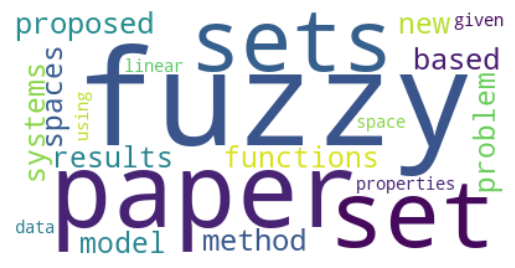

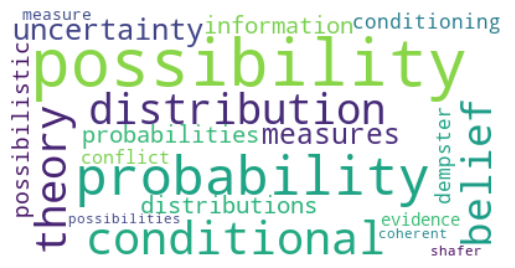

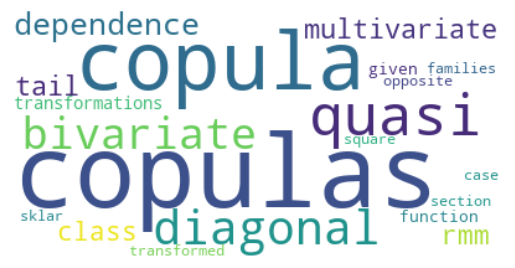

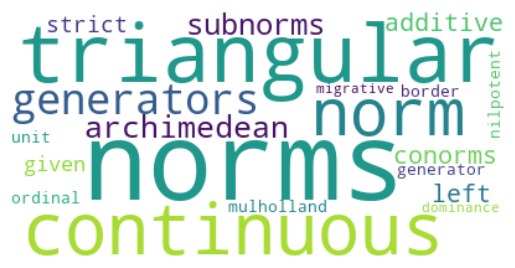

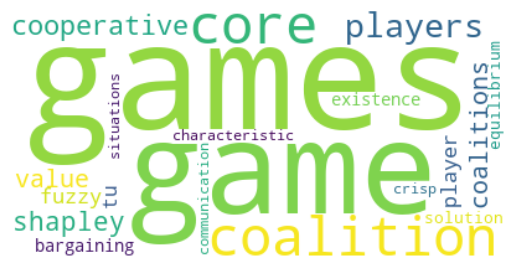

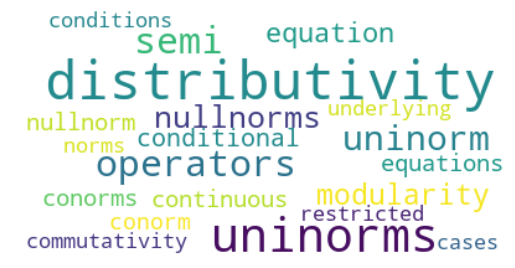

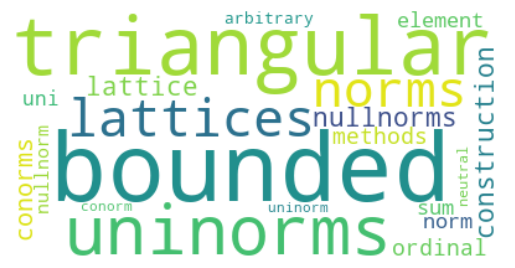

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    # print(len(text))
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# Show wordcloud
for i in range(7):
    create_wordcloud(topic_model, topic=i)

In [45]:
top_n_topics = 7
img = topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=top_n_topics)
img.show()

file_name = "plt\\plt_b_" + str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
# img.write_image("test.png")
img.write_html(file_name)

In [46]:
img1 = topic_model.visualize_topics_over_time(topics_over_time, topics=[n + 2 for n in range(5)])
img1.show()

file_html_name = "plt\\plt_b_" + str(nr_bins) + "_t_" + str(top_n_topics) + ".html"
file_png_name = "plt\\plt_b_" + str(nr_bins) + "_t_" + str(top_n_topics) + ".png"
# img.write_image("test.png")
img1.write_html(file_html_name)
img1.write_image(file_png_name)

In [47]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2470,-1_fuzzy_paper_based_control,"[fuzzy, paper, based, control, set, proposed, ...",[the epistemic uncertainty stems from the lack...
1,0,5263,0_fuzzy_paper_set_sets,"[fuzzy, paper, set, sets, proposed, based, met...",[the properties of a fuzzy algebraic structure...
2,1,112,1_possibility_probability_conditional_distribu...,"[possibility, probability, conditional, distri...",[in a recent paper in fuzzy sets and systems l...
3,2,92,2_copulas_copula_quasi_diagonal,"[copulas, copula, quasi, diagonal, bivariate, ...",[copula models have become popular in differen...
4,3,69,3_norms_triangular_continuous_norm,"[norms, triangular, continuous, norm, generato...",[in this paper the well known ordinal sum theo...
5,4,54,4_games_game_coalition_core,"[games, game, coalition, core, players, cooper...",[there are cooperative situations in which the...
6,5,45,5_distributivity_uninorms_operators_semi,"[distributivity, uninorms, operators, semi, un...",[there are two cases of the conditional distri...
7,6,43,6_bounded_triangular_uninorms_lattices,"[bounded, triangular, uninorms, lattices, norm...",[this article investigates the construction of...
8,7,39,7_robot_mobile_control_autonomous,"[robot, mobile, control, autonomous, robotic, ...",[a neuro fuzzy system architecture for behavio...
9,8,32,8_fuzzifying_topology_continuity_spaces,"[fuzzifying, topology, continuity, spaces, top...",[in this study we propose a framework for fuzz...


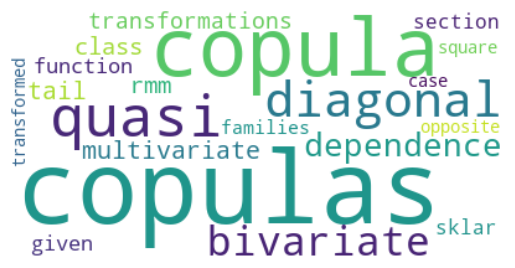

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


# Show wordcloud
create_wordcloud(topic_model, topic=2)